In [2]:
#import libraries
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import  plotly.offline as pyo

#initialize notebook and set ploting to plotly
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'

In [3]:
#get data from nsei stock data
_df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', index_col='minute', parse_dates=True)
_df = _df.interpolate()
_df

,ticker,instrument_token,open,high,low,close
minute,,,,,,
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25


In [6]:
#calculate simple returns
simple_returns=_df.close.pct_change().dropna()
simple_returns

minute
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000971
2017-01-05 09:15:00+05:30    0.008949
2017-01-06 09:15:00+05:30   -0.002666
2017-01-09 09:15:00+05:30   -0.001540
                               ...   
2022-12-26 09:15:00+05:30    0.010447
2022-12-27 09:15:00+05:30    0.006979
2022-12-28 09:15:00+05:30   -0.001475
2022-12-29 09:15:00+05:30    0.005403
2022-12-30 09:15:00+05:30   -0.004946
Name: close, Length: 1477, dtype: float64

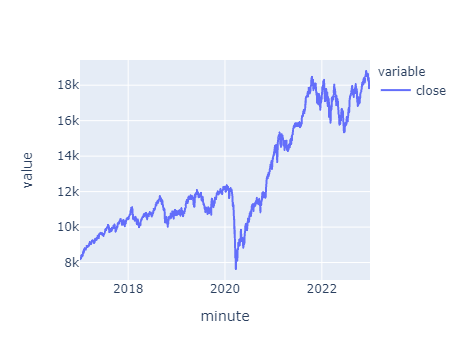

In [8]:
#if we plot close prices
_df.close.plot().update_layout(autosize=False,width=500, height=300)

In [10]:
#last price
_df.close[-1]

18117.05

In [9]:
#getting last price using formula sum of 1 + each return multiply first price
_df.close[0]*np.prod([(1+Rt) for Rt in simple_returns])

18117.050000000043

In [11]:
#log returns is more useful as it have additive property to simplify formula
log_returns=np.log(_df.close/_df.close.shift(1)).dropna()
log_returns

minute
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000970
2017-01-05 09:15:00+05:30    0.008909
2017-01-06 09:15:00+05:30   -0.002670
2017-01-09 09:15:00+05:30   -0.001541
                               ...   
2022-12-26 09:15:00+05:30    0.010392
2022-12-27 09:15:00+05:30    0.006955
2022-12-28 09:15:00+05:30   -0.001476
2022-12-29 09:15:00+05:30    0.005389
2022-12-30 09:15:00+05:30   -0.004958
Name: close, Length: 1477, dtype: float64

In [13]:
#differentiate simple vs log returns
print(_df.close[0]*np.exp(simple_returns.mean()*len(simple_returns)))
print(_df.close[0]*np.exp(log_returns.mean()*len(log_returns)))

19969.798293066007
18117.050000000003


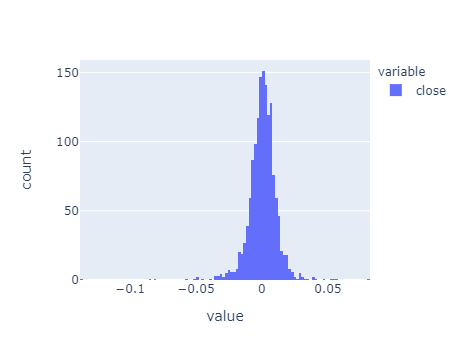

In [14]:
#simple return doesnt contribute to normal distribution
#log return does contribute to normal distribution
log_returns.plot(kind='hist').update_layout(autosize=False,width=500, height=300)

In [23]:
#to get the probability of happening of worst and best case, in return
log_return_sorted=log_returns.tolist()
log_return_sorted.sort()
worst=log_return_sorted[0]
best=log_return_sorted[-1]

std_worst = (worst-log_returns.mean())/log_returns.std()
std_best = (best-log_returns.mean())/log_returns.std()

print('Standard Deviation: Worst %.15f Best %.15f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Standard Deviation: Worst 0.000000000000000 Best 0.000000000013088
